In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import yfinance as yf

In [ ]:
from pandas_datareader import data as pdr

In [ ]:
#this initial table takes a while to run (around 3 min)

#randomly selected 250 stocks from S&P 500
tickers = ['MMM', 'ABBV', 'ACN', 'ADBE', 'AAP', 'AFL', 'APD', 'AKAM', 'ALB', 'ALXN', 'ALLE', 'LNT', 'GOOGL', 'MO', 'AMCR', 'AAL', 'AXP', 'AMT', 'AMP', 'AME', 'APH', 'ANSS', 'AON', 'APA', 'AMAT', 'ADM', 'AJG', 'T', 'ADSK', 'AZO', 'AVY', 'BLL', 'BK', 'BDX', 'BBY', 'BIIB', 'BA', 'BWA', 'BSX', 'AVGO', 'CHRW', 'CDNS', 'CPB', 'CAH', 'CCL', 'CTLT', 'CBOE', 'CDW', 'CNC', 'CERN', 'SCHW', 'CVX', 'CB', 'CI', 'CTAS', 'C', 'CTXS', 'CME', 'KO', 'CL', 'CMA', 'COP', 'STZ', 'CPRT', 'CCI', 'CMI', 'DHI', 'DRI', 'DE', 'XRAY', 'DXCM', 'DLR', 'DISCA', 'DISH', 'DLTR', 'DPZ', 'DUK', 'DD', 'EMN', 'EBAY', 'EIX', 'EA', 'ENPH', 'EOG', 'EQIX', 'ESS', 'ETSY', 'ES', 'EXC', 'EXPD', 'XOM', 'FB', 'FRT', 'FIS', 'FITB', 'FRC', 'FLT', 'FMC', 'FTNT', 'FBHS', 'FCX', 'GRMN', 'GNRC', 'GE', 'GM', 'GILD', 'GPN', 'GWW', 'HBI', 'HAS', 'PEAK', 'HSY', 'HPE', 'HFC', 'HD', 'HRL', 'HUM', 'HII', 'IDXX', 'ITW', 'INCY', 'INTC', 'IBM', 'IPG', 'INTU', 'IVZ', 'IQV', 'JKHY', 'JBHT', 'JNJ', 'JPM', 'KSU', 'KEY', 'KMB', 'KMI', 'KHC', 'LB', 'LH', 'LEG', 'LEN', 'LNC', 'LYV', 'LMT', 'LOW', 'LYB', 'MRO', 'MKTX', 'MMC', 'MAS', 'MKC', 'MCD', 'MDT', 'MET', 'MGM', 'MU', 'MAA', 'TAP', 'MPWR', 'MCO', 'MOS', 'MSCI', 'NTAP', 'NWL', 'NEM', 'NWS', 'NLSN', 'NI', 'NTRS', 'NLOK', 'NOV', 'NUE', 'NVR', 'ORLY', 'ODFL', 'OKE', 'PKG', 'PAYX', 'PYPL', 'PNR', 'PEP', 'PRGO', 'PM', 'PNW', 'PNC', 'PPG', 'PFG', 'PGR', 'PRU', 'PSA', 'PVH', 'PWR', 'DGX', 'RJF', 'O', 'REGN', 'RG', 'RHI', 'ROL', 'ROST', 'SPGI', 'SBAC', 'STX', 'SRE', 'SHW', 'SWKS', 'SO', 'SWK', 'STT', 'SYK', 'SYF', 'SYY', 'TROW', 'TPR', 'TEL', 'TFX', 'TSLA', 'TXT', 'TJX', 'TT', 'TRV', 'TFC', 'TYL', 'UDR', 'USB', 'UA', 'UAL', 'UPS', 'UHS', 'VLO', 'VTR', 'VRSK', 'VRTX', 'VIAC', 'V', 'VNO', 'WRB', 'WMT', 'DIS', 'WAT', 'WFC', 'WST', 'WU', 'WY', 'WMB', 'WYNN', 'XLNX', 'YUM', 'ZBH', 'ZTS']

def get_sp500_index(tickers):
    return pdr.get_data_yahoo(tickers)


In [ ]:
#cleaned table
def extract(data, attr):
    attr_data = data[attr].reset_index()
    attr_data = attr_data.melt(id_vars='Date').set_index(['Date', 'Symbols'])
    attr_data = attr_data.rename(columns={'value': attr})
    return attr_data

# attr_datas = [extract(data, attr) for attr in data.columns.levels[0]]
# data_by_symbol = attr_datas[0].join(attr_datas[1:])
# data_by_symbol.to_csv('api_data.csv')
data_by_symbol = pd.read_csv('api_data.csv', index_col = 'Date', parse_dates = True)
data_by_symbol.head(20)

,Symbols,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,,
2016-04-26,MMM,143.528381,166.179993,167.789993,164.970001,167.500000,3192100.0
2016-04-27,MMM,144.893021,167.759995,168.380005,166.100006,166.990005,2227700.0
2016-04-28,MMM,144.236649,167.000000,168.770004,166.199997,166.850006,1654700.0
2016-04-29,MMM,144.564835,167.380005,167.779999,166.500000,166.979996,1961200.0
2016-05-02,MMM,145.394012,168.339996,168.500000,166.940002,167.300003,1700300.0
2016-05-03,MMM,145.074448,167.970001,168.070007,166.660004,167.389999,1922200.0
2016-05-04,MMM,144.374878,167.160004,167.699997,166.289993,166.369995,2118100.0
2016-05-05,MMM,144.901657,167.770004,168.330002,167.190002,167.460007,1680200.0
2016-05-06,MMM,145.869019,168.889999,169.050003,167.000000,167.839996,1630200.0


In [ ]:
def get_obv_helper(data, close_col, vol_col, trend_periods=13):
    for index, row in data.iterrows():
        if index > 0:
            last_obv = data.at[index - 1, 'obv']
            if row[close_col] > data.at[index - 1, close_col]:
                current_obv = last_obv + row[vol_col]
            elif row[close_col] < data.at[index - 1, close_col]:
                current_obv = last_obv - row[vol_col]
            else:
                current_obv = last_obv
        else:
            last_obv = 0
            current_obv = row[vol_col]

        data.at[index, 'obv'] = current_obv
    data['obv_ema' + str(trend_periods)] = data['obv'].ewm(ignore_na=False, min_periods=0, com=trend_periods, adjust=True).mean()
    return data

def get_obv():
    """
    Getting the On-Balance Volume for the symbol and creates the Master table
    """
    new_data = data_by_symbol.reset_index() 
    group_by_symbol = new_data.groupby('Symbols')
    dfs = []
    for symbol, data in group_by_symbol:
        data_with_obv = get_obv_helper(data=data.reset_index(drop=True), close_col='Close', vol_col='Volume')
        dfs.append(data_with_obv)
    master_df = pd.concat(dfs)
    return master_df

master_df = get_obv()


In [ ]:
def get_rsi():
    group_by_symbol = master_df.groupby('Symbols')
    dfs = []
    for symbol, symbol_data in group_by_symbol:
        delta = symbol_data['Close'].diff() #row i - row prev for Close
        up = delta.clip(lower = 0)
        down = -1 * delta.clip(upper = 0)
        ema_up = up.ewm(com = 13, adjust = False).mean() #exponential weighted function calculated recursively
        ema_down = down.ewm(com = 13, adjust = False).mean()
        rs = ema_up / ema_down #avg gain / avg loss
        symbol_data['rsi'] = 100 - (100/(1 + rs))
        symbol_data = symbol_data.iloc[14: ] #skip first 14 days to have real values
        dfs.append(symbol_data)
    master = pd.concat(dfs)
    return master

master_df = get_rsi()


In [ ]:
#finds average true range (ATR)
def get_atr_helper(data, trend_periods = 14, open_col = 'Open', high_col = 'High', low_col = 'Low', close_col = 'Close', drop_tr = True):
    for index, row in data.iterrows():
        prices = [row[high_col], row[low_col], row[close_col], row[open_col]]
        if index > 0:
            val1 = np.amax(prices) - np.amin(prices)
            val2 = abs(np.amax(prices) - data.at[index - 1, close_col])
            val3 = abs(np.amin(prices) - data.at[index - 1, close_col])
            true_range = np.amax([val1, val2, val3])
        else:
            true_range = np.amax(prices) - np.amin(prices)
        data.at[index, 'true_range'] = true_range

    data['atr'] = data['true_range'].ewm(ignore_na=False, min_periods=0, com=trend_periods, adjust=True).mean()
    if drop_tr:
        data = data.drop(['true_range'], axis = 1)
    return data

def get_atr():
    group_by_symbol = master_df.groupby('Symbols')
    dfs = []
    for symbol, data in group_by_symbol:
        data_with_obv = get_atr_helper(data = data.reset_index(drop = True))
        dfs.append(data_with_obv)
    master = pd.concat(dfs)
    return master

master_df = get_atr()

In [ ]:
#finds the exponential moving average 
def ema_helper(data, period=14, column='Close'): 
    data['ema' + str(period)] = data[column].ewm(ignore_na=False, min_periods=period, com=period, adjust=True).mean()
    return data

def get_ema():    
    group_by_symbol = master_df.groupby('Symbols')
    dfs = []
    for symbol, data in group_by_symbol:
        data_with_obv = ema_helper(data = data.reset_index(drop = True))
        dfs.append(data_with_obv)
    master = pd.concat(dfs)
    return master
master_df = get_ema()

In [ ]:
#finds EMA of different time frames and MACD

def ema_helper9(data, period=9, column='Close'): 
    data['ema' + str(period)] = data[column].ewm(ignore_na=False, min_periods=period, com=period, adjust=True).mean()
    return data

def ema_helper26(data, period=26, column='Close'): 
    data['ema' + str(period)] = data[column].ewm(ignore_na=False, min_periods=period, com=period, adjust=True).mean()
    return data

def ema_helper12(data, period=12, column='Close'): 
    data['ema' + str(period)] = data[column].ewm(ignore_na=False, min_periods=period, com=period, adjust=True).mean()
    return data

def get_macd1():    
    group_by_symbol = master_df.groupby('Symbols')
    dfs = []
    for symbol, data in group_by_symbol:
        data_with_obv = ema_helper26(data = data.reset_index(drop = True))
        dfs.append(data_with_obv)
    master = pd.concat(dfs)
    return master
master_df = get_macd1()

def get_macd2():    
    group_by_symbol = master_df.groupby('Symbols')
    dfs = []
    for symbol, data in group_by_symbol:
        data_with_obv = ema_helper12(data = data.reset_index(drop = True))
        dfs.append(data_with_obv)
    master = pd.concat(dfs)
    return master
master_df = get_macd2()
    
def get_ema9():    
    group_by_symbol = master_df.groupby('Symbols')
    dfs = []
    for symbol, data in group_by_symbol:
        data_with_obv = ema_helper9(data = data.reset_index(drop = True))
        dfs.append(data_with_obv)
    master = pd.concat(dfs)
    return master
master_df = get_ema9()

macdline = master_df.ema12 - master_df.ema26

signalline = master_df.ema9
macdhist = macdline - signalline

master_df.insert(10,"macd",macdline,True)

master_df.insert(1,"macdhist",macdhist,True)

master_df = master_df.dropna()

master_df


,Date,macdhist,Symbols,Adj Close,Close,High,Low,Open,Volume,obv,obv_ema13,macd,rsi,atr,ema14,ema26,ema12,ema9
25,2016-06-21,-31.218033,AAL,28.849916,30.020000,30.389999,29.690001,30.290001,8922900.0,-14348500.0,-2.977929e+07,-0.240186,37.167829,1.014033,31.181961,31.359314,31.119128,30.977847
26,2016-06-22,-31.124232,AAL,28.724991,29.889999,30.330000,29.820000,30.049999,6675900.0,-21024400.0,-2.912247e+07,-0.261886,36.491161,0.974256,31.080003,31.274157,31.012270,30.862346
27,2016-06-23,-31.073185,AAL,29.147839,30.330000,30.490000,29.770000,30.250000,9139900.0,-11884500.0,-2.783386e+07,-0.267014,40.443282,0.954434,31.021531,31.220557,30.953544,30.806171
28,2016-06-24,-30.779774,AAL,25.995686,27.049999,28.500000,27.040001,28.200001,36049900.0,-47934400.0,-2.933148e+07,-0.367787,26.969814,1.134486,30.715359,30.988378,30.620591,30.411988
29,2016-06-27,-30.382878,AAL,24.285061,25.270000,26.850000,24.850000,26.850000,23170100.0,-71104500.0,-3.243429e+07,-0.507851,22.574570,1.215781,30.299899,30.675853,30.168002,29.875026
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1239,2021-04-19,-159.737935,ZTS,167.850006,168.100006,168.270004,166.589996,167.500000,1842700.0,276335400.0,2.638935e+08,1.104383,70.455712,3.123210,159.541222,158.827773,159.932156,160.842318
1240,2021-04-20,-160.217296,ZTS,168.740005,168.740005,169.699997,167.550003,167.949997,1984700.0,278320100.0,2.649240e+08,1.414790,71.350774,3.058329,160.154474,159.194893,160.609683,161.632087
1241,2021-04-21,-160.740962,ZTS,170.149994,170.149994,171.160004,168.880005,169.580002,1206900.0,279527000.0,2.659671e+08,1.742916,73.271953,3.015773,160.820842,159.600637,161.343553,162.483877
1242,2021-04-22,-161.155949,ZTS,169.070007,169.070007,170.110001,167.839996,169.710007,1467700.0,278059300.0,2.668308e+08,1.986541,69.431362,2.968722,161.370786,159.951355,161.937895,163.142490


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

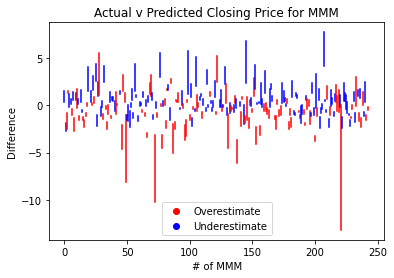

In [ ]:
data_with_obv = master_df.dropna(subset=['ema14'])
data_with_obv = data_with_obv.loc[data_with_obv['Symbols'] == 'MMM']

#indicators rsi, obv, ema, atr
X = data_with_obv[["Open","rsi","obv","ema14","obv_ema13","ema9","ema26","macd","macdhist","atr"]]
Y = data_with_obv["Close"]


X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state= 0)
model = LinearRegression()
model.fit(X_train, Y_train)
y_pred = model.predict(X_test)
result = pd.DataFrame({'Actual Increase': Y_test - X_test['Open'], 'Predicted': y_pred - X_test['Open'], 'Open': X_test['Open']})

result['x1'] = result.index
actual_increase = result['Actual Increase'].to_numpy()
predicted = result['Predicted'].to_numpy()
index = result['x1']

for i in range(len(predicted)):
    if(predicted[i]>actual_increase[i]):
        plt.plot([i,i],[predicted[i],actual_increase[i]],color="red")
    if(predicted[i]<actual_increase[i]):
        plt.plot([i,i],[predicted[i],actual_increase[i]],color="blue")

plt.scatter([],[],color="red",label="Overestimate")
plt.scatter([],[],color="blue",label="Underestimate")
plt.title("Actual v Predicted Closing Price for MMM")
plt.xlabel("# of MMM")
plt.ylabel("Difference")
plt.legend()
plt.show()


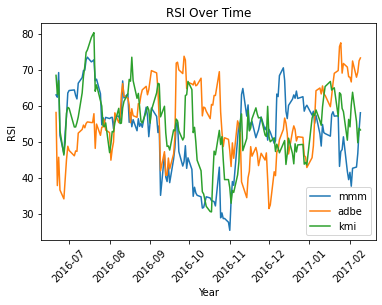

In [ ]:
# line plot of MMM, ADBE, KMI stock analyzing for rsi trends over a year

mmm = master_df[master_df['Symbols'] == 'MMM']['rsi'].to_numpy()
adbe = master_df[master_df['Symbols'] == 'ADBE']['rsi'].to_numpy()
kmi = master_df[master_df['Symbols'] == 'KMI']['rsi'].to_numpy()

mmm_date = master_df[master_df['Symbols'] == 'MMM']['Date'].to_numpy()
adbe_date = master_df[master_df['Symbols'] == 'ADBE']['Date'].to_numpy()
kmi_date = master_df[master_df['Symbols'] == 'KMI']['Date'].to_numpy()

plt.plot(mmm_date[:162], mmm[:162], label = 'mmm')
plt.plot(adbe_date[:162], adbe[:162], label= 'adbe')
plt.plot(kmi_date[:162], kmi[:162], label = 'kmi')

plt.legend()
plt.title("RSI Over Time")
plt.xlabel("Year")
plt.ylabel("RSI")
plt.xticks(rotation=45)
plt.show()

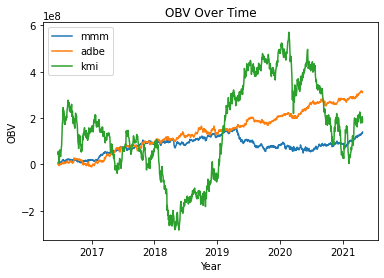

In [ ]:
# line plot of MMM, ADBE, KMI stock analyzing for obv trends over time

mmm = master_df[master_df['Symbols'] == 'MMM']['obv'].to_numpy()
adbe = master_df[master_df['Symbols'] == 'ADBE']['obv'].to_numpy()
kmi = master_df[master_df['Symbols'] == 'KMI']['obv'].to_numpy()

plt.plot(master_df[master_df['Symbols'] == 'MMM']['Date'].to_numpy(), mmm, label = 'mmm')
plt.plot(master_df[master_df['Symbols'] == 'ADBE']['Date'].to_numpy(), adbe, label= 'adbe')
plt.plot(master_df[master_df['Symbols'] == 'KMI']['Date'].to_numpy(), kmi, label = 'kmi')

plt.legend()
plt.title("OBV Over Time")
plt.xlabel("Year")
plt.ylabel("OBV")
plt.show()

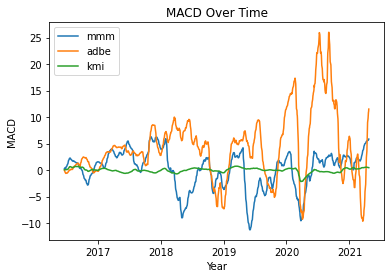

In [ ]:
# line plot of MMM, ADBE, KMI stock analyzing for macd trends over time

mmm = master_df[master_df['Symbols'] == 'MMM']['macd'].to_numpy()
adbe = master_df[master_df['Symbols'] == 'ADBE']['macd'].to_numpy()
kmi = master_df[master_df['Symbols'] == 'KMI']['macd'].to_numpy()

plt.plot(master_df[master_df['Symbols'] == 'MMM']['Date'].to_numpy(), mmm, label = 'mmm')
plt.plot(master_df[master_df['Symbols'] == 'ADBE']['Date'].to_numpy(), adbe, label= 'adbe')
plt.plot(master_df[master_df['Symbols'] == 'KMI']['Date'].to_numpy(), kmi, label = 'kmi')

plt.legend()
plt.title("MACD Over Time")
plt.xlabel("Year")
plt.ylabel("MACD")
plt.show()

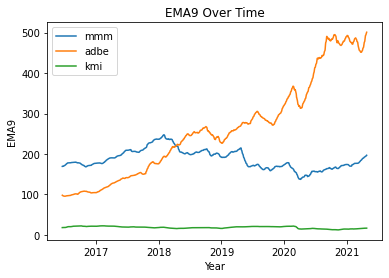

In [ ]:
# line plot of MMM, ADBE, KMI stock analyzing for ema9 trends over time

mmm = master_df[master_df['Symbols'] == 'MMM']['ema9'].to_numpy()
adbe = master_df[master_df['Symbols'] == 'ADBE']['ema9'].to_numpy()
kmi = master_df[master_df['Symbols'] == 'KMI']['ema9'].to_numpy()

plt.plot(master_df[master_df['Symbols'] == 'MMM']['Date'].to_numpy(), mmm, label = 'mmm')
plt.plot(master_df[master_df['Symbols'] == 'ADBE']['Date'].to_numpy(), adbe, label= 'adbe')
plt.plot(master_df[master_df['Symbols'] == 'KMI']['Date'].to_numpy(), kmi, label = 'kmi')

plt.legend()
plt.title("EMA9 Over Time")
plt.xlabel("Year")
plt.ylabel("EMA9")
plt.show()

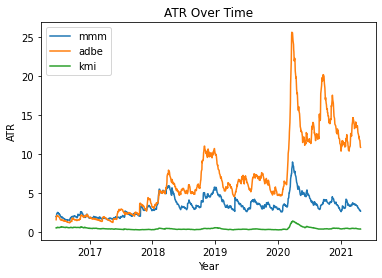

In [ ]:
# line plot of MMM, ADBE, KMI stock analyzing for atr trends over time

mmm = master_df[master_df['Symbols'] == 'MMM']['atr'].to_numpy()
adbe = master_df[master_df['Symbols'] == 'ADBE']['atr'].to_numpy()
kmi = master_df[master_df['Symbols'] == 'KMI']['atr'].to_numpy()

plt.plot(master_df[master_df['Symbols'] == 'MMM']['Date'].to_numpy(), mmm, label = 'mmm')
plt.plot(master_df[master_df['Symbols'] == 'ADBE']['Date'].to_numpy(), adbe, label= 'adbe')
plt.plot(master_df[master_df['Symbols'] == 'KMI']['Date'].to_numpy(), kmi, label = 'kmi')

plt.legend()
plt.title("ATR Over Time")
plt.xlabel("Year")
plt.ylabel("ATR")
plt.show()

In [ ]:
#finds bollinger band values

def ema_helper9(data, period=9, column='Close'): 
    data['ema' + str(period)] = data[column].ewm(ignore_na=False, min_periods=period, com=period, adjust=True).mean()
    return data


#define moving average function
def moving_avg(x, n):
    ma = np.cumsum(np.insert(x, 0, 0)) 
    average = cumsum[n:] - cumsum[:-n]) / float(n)
    return average

def ma_helper20(data, period=20, column='Close'): 
    data['ma' + str(period)] = moving_avg(data[column], period)
    return data


#calculate moving average using previous 20 time periods






SyntaxError: invalid syntax (<ipython-input-19-5056803432a9>, line 11)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [ ]:
def simulate_model(stock):
    data_with_obv = master_df.dropna(subset=['ema14'])
    data_with_obv = data_with_obv.loc[data_with_obv['Symbols'] == stock]

    #indicators rsi, obv, ema, atr
    X = data_with_obv[["Open","rsi","obv","ema14","ema13","ema9","ema26","macd","macdhist","atr"]]
    Y = data_with_obv["Close"]

    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state= 0)
    model = linear_model.LinearRegression()
    model.fit(X_train, Y_train)
    y_pred = model.predict(X_test)
    result = pd.DataFrame({'Actual Increase': Y_test - X_test['Open'], 'Predicted': y_pred - X_test['Open'], 'Open': X_test['Open']})
    counter = 0
    actual_np = result['Actual Increase'].to_numpy()
    predicted_np = result['Predicted'].to_numpy()
    for i in range(len(result)):
        if(actual_np[i] > 0 and predicted_np[i] > 0):
            counter += 1
        if(actual_np[i] < 0 and predicted_np[i] < 0):
            counter += 1
    return counter / len(result)
percentages = []
for stock in tickers:
    percentages.append(simulate_model(stock))
percentages.sort()

percentage_avg = sum(percentages)/250


#print(percentages)

print(percentage_avg)



0.7471508379888261


In [ ]:

def ema_helper26(data, period=26, column='Close'): 
    data['ema' + str(period)] = data[column].ewm(ignore_na=False, min_periods=period, com=period, adjust=True).mean()
    return data

def ema_helper12(data, period=12, column='Close'): 
    data['ema' + str(period)] = data[column].ewm(ignore_na=False, min_periods=period, com=period, adjust=True).mean()
    return data

#finds MACD

def get_macd():    
    group_by_symbol = master_df.groupby('Symbols')
    dfs = []
    for symbol, data in group_by_symbol:
        data_with_obv = ema_helper26(data = data.reset_index(drop = True))
        dfs.append(data_with_obv)
    master = pd.concat(dfs)
    return master
master_df = get_ema()


#finds the exponential moving average 


def get_ema():    
    group_by_symbol = master_df.groupby('Symbols')
    dfs = []
    for symbol, data in group_by_symbol:
        data_with_obv = ema_helper(data = data.reset_index(drop = True))
        dfs.append(data_with_obv)
    master = pd.concat(dfs)
    return master
master_df = get_ema()




def simulate_model(stock):
    data_with_obv = master_df.dropna(subset=['ema14'])
    data_with_obv = data_with_obv.loc[data_with_obv['Symbols'] == stock]

    #indicators rsi, obv, ema, atr
    X = data_with_obv[["Open","rsi","obv","ema14"]]
    Y = data_with_obv["Close"]

    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state= 0)
    model = linear_model.LinearRegression()
    model.fit(X_train, Y_train)
    y_pred = model.predict(X_test)
    result = pd.DataFrame({'Actual Increase': Y_test - X_test['Open'], 'Predicted': y_pred - X_test['Open'], 'Open': X_test['Open']})
    counter = 0
    actual_np = result['Actual Increase'].to_numpy()
    predicted_np = result['Predicted'].to_numpy()
    for i in range(len(result)):
        if(actual_np[i] > 0 and predicted_np[i] > 0):
            counter += 1
        if(actual_np[i] < 0 and predicted_np[i] < 0):
            counter += 1
    return counter / len(result)
total = 0
for stock in tickers:
    percentage = simulate_model(stock)
    total += percentage
print(total / 250)


0.7399180327868852


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

df = pd.read_csv("")
df.columns = ['x1','x2','x3','x4','x5','x6']
print(df.describe())


data_with_obv.columns

FileNotFoundError: [Errno 2] No such file or directory: ''

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state= 0)
rmsd = np.sqrt(mean_squared_error(Y_test, y_pred))      
r2_value = r2_score(Y_test, y_pred)                     

print("Intercept: \n", model.intercept_)
print("Root Mean Square Error \n", rmsd)
print("R^2 Value: \n", r2_value)

NameError: name 'X' is not defined

In [ ]:
df.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

# Root Mean Squared Deviation
rmsd = np.sqrt(mean_squared_error(Y_test, y_pred))      # Lower the rmse(rmsd) is, the better the fit
r2_value = r2_score(Y_test, y_pred)                     # The closer towards 1, the better the fit

print("Y-Intercept: \n", model.intercept_)
print("Root Mean Square Error(rmsd) \n", rmsd)
print("R^2 Value: \n", r2_value)


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=f5ced862-5fbe-4aaf-aa19-de0a34eeda69' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>